In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv("Stock Exchange.csv")

In [89]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [90]:
df["symbol"].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [91]:
#checking for concise statistical summary
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [92]:
df.isnull().sum()
#Finding percentage number of nulls
for i in df.columns:
  print(i, df[i].isna().mean()*100)

date 0.0
symbol 0.0
open 0.0
close 0.0
low 0.0
high 0.0
volume 0.0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [94]:
#Changing date column from string to float
df["date"] = pd.to_datetime(df["date"])

In [100]:
df["date"]

1762

In [55]:
df = df[df['symbol']=='GOOGL']
df.head()

,date,symbol,open,close,low,high,volume
440,2010-01-04,GOOGL,313.788792,313.688694,312.432438,315.070073,3908400.0
908,2010-01-05,GOOGL,313.903904,312.307316,311.081089,314.234226,6003300.0
1376,2010-01-06,GOOGL,313.243260,304.434452,303.483494,313.243260,7949400.0
1844,2010-01-07,GOOGL,305.005009,297.347355,296.621617,305.305302,12815700.0
2312,2010-01-08,GOOGL,296.296299,301.311314,294.849857,301.926945,9439100.0


<Axes: >

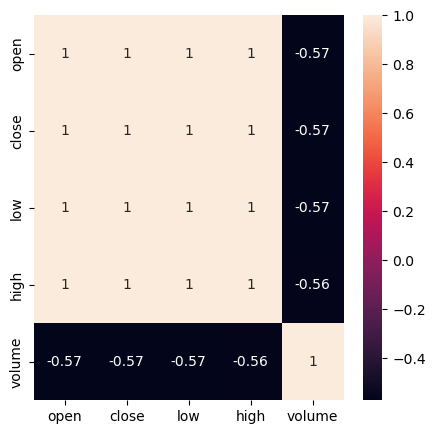

In [58]:
correlation_map = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

In [61]:
def correlated_columns(column, threshold): 
  # Column is the column or feature being considered 
  #Threshold is the minimum correlated value accepted
  feature=[]
  value=[]

  for i,index in enumerate(column.index):
    if abs(column[index]) > threshold:
      feature.append(index)
      value.append(column[index])

  df = pd.DataFrame(data = value, index = feature, columns=['correlation value'])
  return df



In [63]:
highest_correlation = correlated_columns(correlation_map['close'], 0.60)
highest_correlation

,correlation value
open,0.999521
close,1.000000
low,0.999811
high,0.999757


In [65]:
df = df[highest_correlation.index]
df.head()

,open,close,low,high
440,313.788792,313.688694,312.432438,315.070073
908,313.903904,312.307316,311.081089,314.234226
1376,313.243260,304.434452,303.483494,313.243260
1844,305.005009,297.347355,296.621617,305.305302
2312,296.296299,301.311314,294.849857,301.926945


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1762 entries, 440 to 850964
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1762 non-null   float64
 1   close   1762 non-null   float64
 2   low     1762 non-null   float64
 3   high    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB


C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Temp\ipykernel_12844\532747213.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


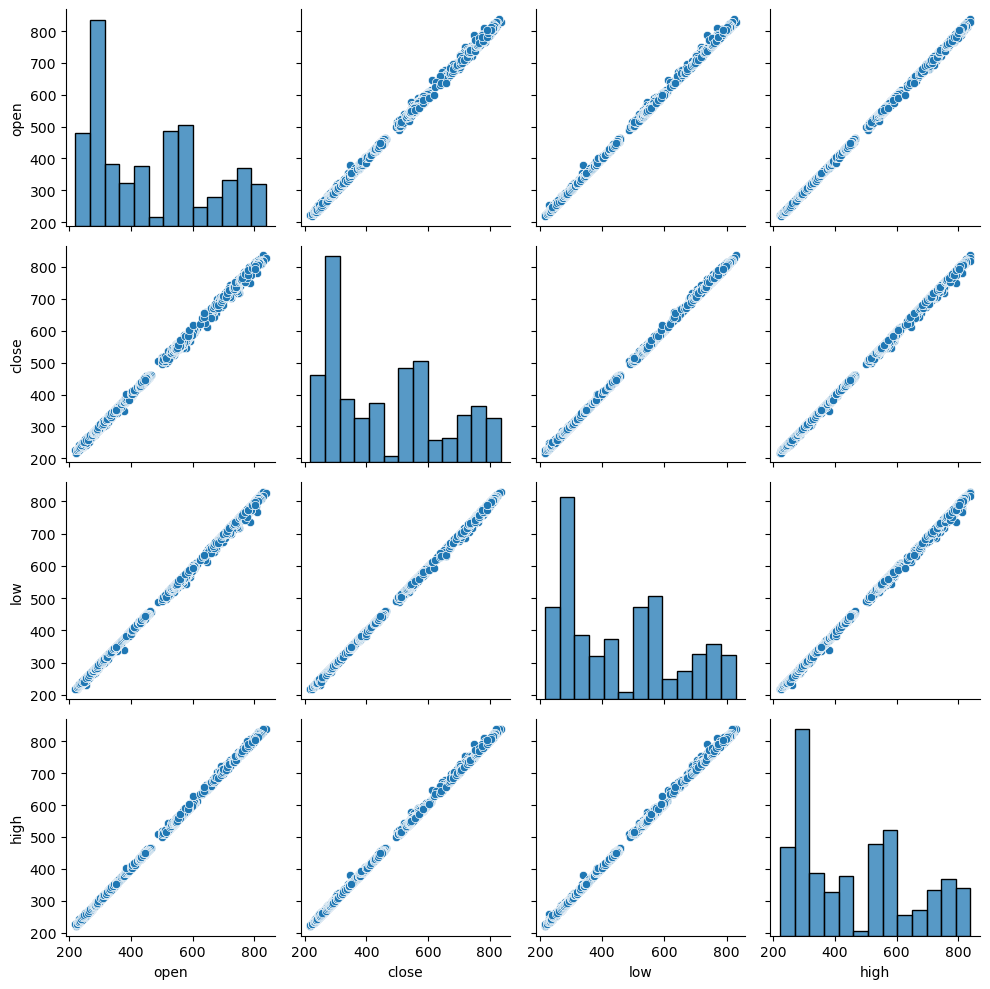

In [67]:
sns.pairplot(df)
plt.tight_layout()

In [68]:
#Droping target variable "close"
X = df.drop(['close'], axis=1)
y = df['close']

In [69]:
# Huge variation in data set hence important to scale independent variables
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,open,low,high
0,0.152496,0.155881,0.151721
1,0.152682,0.153673,0.150368
2,0.151615,0.141259,0.148763
3,0.138309,0.130047,0.135911
4,0.124243,0.127152,0.130441


# Building the model

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#Splitting data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
y_pred = model.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
795964,757.650024,755.628926
625332,557.609985,557.407245
108240,282.457462,284.966249
347470,343.053044,344.983966
212580,295.550541,294.203856


In [78]:
#Checking for model accuracy
from sklearn.metrics import r2_score
 
print(f"{r2_score(y_test, y_pred)}")

0.9997866613161377


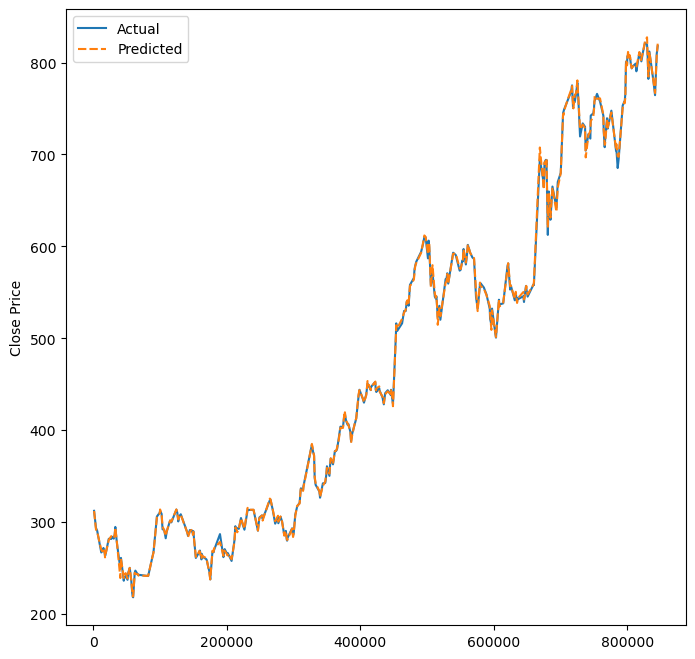

In [102]:
plt.figure(figsize=(8,8))
sns.lineplot(pred_df)
plt.ylabel('Close Price')
plt.legend()
plt.show()